# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load data
toxic_data = pd.read_csv('kaggle_data/train.csv')

In [35]:
# Check dimensions
print('Number of rows and columns in the toxic data set:', toxic_data.shape)

Number of rows and columns in the toxic data set: (159571, 8)


In [36]:
toxic_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [38]:
toxic_data.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [44]:
# Check for missing values
toxic_data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [3]:
target_columns = list(toxic_data.columns)[2:]

In [37]:
print(toxic_data[target_columns].apply(pd.Series.value_counts))

    toxic  severe_toxic  obscene  threat  insult  identity_hate
0  144277        157976   151122  159093  151694         158166
1   15294          1595     8449     478    7877           1405


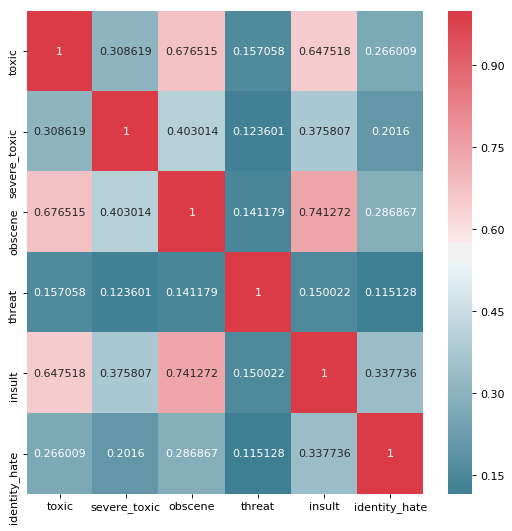

In [45]:
# Check correlation between labels
corr = toxic_data[target_columns].corr()
fig = plt.figure(figsize=(8, 8), dpi=80) 
sns.heatmap(corr, annot=True, fmt='g', cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

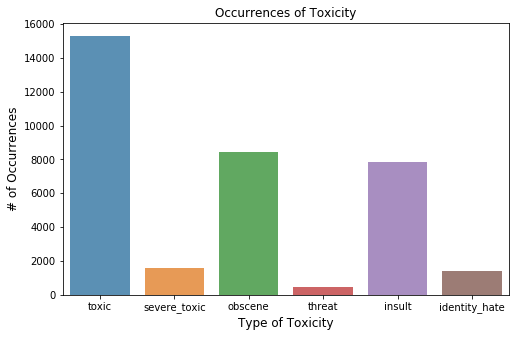

In [10]:
# Check occurrences of toxicity
x = toxic_data[target_columns].sum()

plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values, alpha=0.8)
rects = ax.patches

plt.title('Occurrences of Toxicity')
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type of Toxicity', fontsize=12)